In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv


**#LOADING DATASET**

In [3]:
df = pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

**#CHECKING FOR 5 FIRST ROWS**

In [4]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


**#CHECKING NUMBER OF ROWS & COLUMNS**

In [5]:
df.shape

(1219567, 11)

**#DESCRIPTIVE STATS**

In [7]:
df.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


**#CHECKING FOR DATA TYPES, COLUMNS &NON NULL VALUES**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


**#CHECKING FOR MISSING VALUES**

In [8]:
df.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [9]:
df.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

In [12]:
df[['Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']]

,Vehicle Type,Weather,Economic Condition,Day Of Week
0,Drone,Snowy,Stable,Sunday
1,Flying Car,Solar Flare,Recession,Wednesday
2,Autonomous Vehicle,Solar Flare,Recession,Wednesday
3,Drone,Clear,Booming,Thursday
4,Autonomous Vehicle,Solar Flare,Stable,Saturday
...,...,...,...,...
1219562,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday
1219563,Drone,Snowy,Booming,Saturday
1219564,Autonomous Vehicle,Snowy,Booming,Monday
1219565,Autonomous Vehicle,Clear,Booming,Monday


**ENCODING CATEGORICAL COLUMNS**

In [14]:
data = pd.DataFrame({'C': ['Vehicle Type', 'Weather', 'Economc Conditin', 'Day Of Week']})
encode = pd.get_dummies(data[['C']])
print(encode.astype(int))

   C_Day Of Week  C_Economc Conditin  C_Vehicle Type  C_Weather
0              0                   0               1          0
1              0                   0               0          1
2              0                   1               0          0
3              1                   0               0          0


**PLOTTING AND VISUALIZATION**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

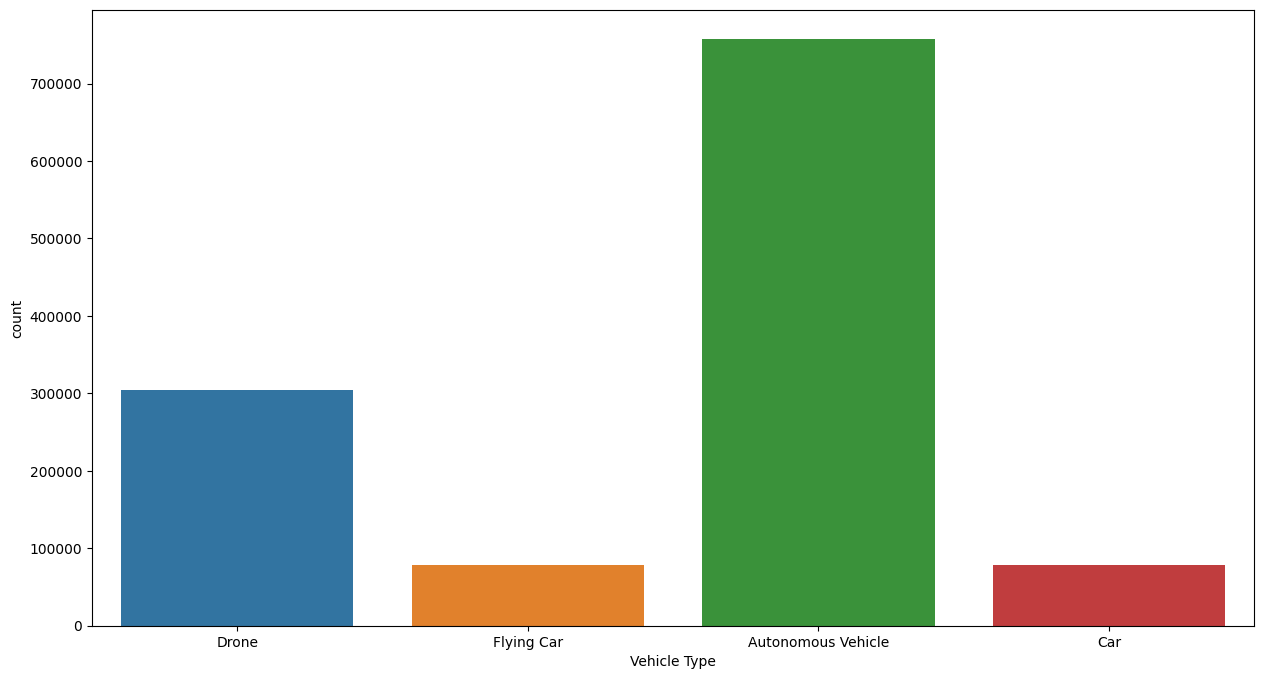

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = 'Vehicle Type')
plt.show()